# Assignment: Trees
Do three questions.

I did questions 1,2, and 3

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Trees are built by splitting the dataset into smaller and smaller subsets based on feature values. The process starts at the root node and uses a criterion (like Gini or entropy) to determine the best split at each level, recursively building branches until some stopping rule is met (like max depth or min samples per leaf).




2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

Trees naturally handle non-linear relationships by partitioning the input space into smaller regions with different outputs. Unlike linear models that assume a straight-line relationship, trees can model complex, jagged decision boundaries without needing any transformation of the input features.



3. Why is the Gini a good loss function for categorical target variables? 

Gini impurity measures how often a randomly chosen element from the dataset would be incorrectly labeled. It’s computationally efficient and helps find splits that result in pure child nodes (where one class dominates), which is ideal for classification.




4. Why do trees tend to overfit, and how can this tendency be constrained? 

Trees overfit because they can keep splitting until each leaf contains very few samples, capturing noise in the data. This can be constrained by limiting depth, setting a minimum number of samples per split/leaf, or pruning the tree after construction.




5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

False. Trees work well with both categorical and numerical variables. They don’t assume a particular distribution and can handle complex patterns, regardless of variable types. However, one-hot encoding is necessary for categorical variables.




6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Binary splits simplify the tree structure and make the decision-making process more interpretable and computationally efficient. Multiple branches (multiway splits) can lead to high variance and less generalization.



7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

    If the tree is very deep with many nodes: likely overfitting.

    If training accuracy is very high but test accuracy is low: overfitting.

    If the tree is too shallow and performs poorly on both train and test: underfitting.

    Visual inspection: A very “bushy” tree may indicate overfitting.



**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [66]:
# 2.1
import pandas as pd

df = pd.read_csv('/Users/leyakappukattil/Documents/Spr24-25/DS3001/trees/assignment/data/cars_hw.csv')
print(df.shape)  # shows (rows, columns)
print(df.columns)  # lists the column names
df.head()


(976, 12)
Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [67]:
#2.2
categorical_cols = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numerical_cols = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='Price')
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
#2.3

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

best_r2 = float('-inf')
best_leaf = None

for leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_leaf = leaf
    print(f'Leaf: {leaf}, R²: {r2:.4f}')

print(f'\nBest leaf size: {best_leaf}, Best R²: {best_r2:.4f}')


Leaf: 1, R²: 0.8186
Leaf: 2, R²: 0.7857
Leaf: 3, R²: 0.7927
Leaf: 4, R²: 0.8124
Leaf: 5, R²: 0.8212
Leaf: 6, R²: 0.8115
Leaf: 7, R²: 0.8156
Leaf: 8, R²: 0.8213
Leaf: 9, R²: 0.8143
Leaf: 10, R²: 0.7963
Leaf: 11, R²: 0.7985
Leaf: 12, R²: 0.7895
Leaf: 13, R²: 0.7922
Leaf: 14, R²: 0.7890
Leaf: 15, R²: 0.7867
Leaf: 16, R²: 0.7733
Leaf: 17, R²: 0.7757
Leaf: 18, R²: 0.7730
Leaf: 19, R²: 0.7506
Leaf: 20, R²: 0.7494
Leaf: 21, R²: 0.7472
Leaf: 22, R²: 0.7506
Leaf: 23, R²: 0.7347
Leaf: 24, R²: 0.7281
Leaf: 25, R²: 0.7213

Best leaf size: 8, Best R²: 0.8213


R²: 0.8213
RMSE: 143159.09


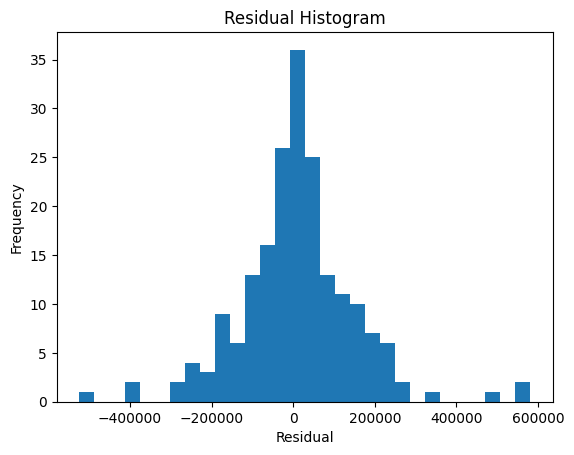

In [69]:
#2.4

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

best_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')

# Residual plot
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.title('Residual Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [70]:
#2.5

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

lin_r2 = r2_score(y_test, lin_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))

print(f'Linear Model R²: {lin_r2:.4f}')
print(f'Linear Model RMSE: {lin_rmse:.2f}')


Linear Model R²: 0.8164
Linear Model RMSE: 145117.59


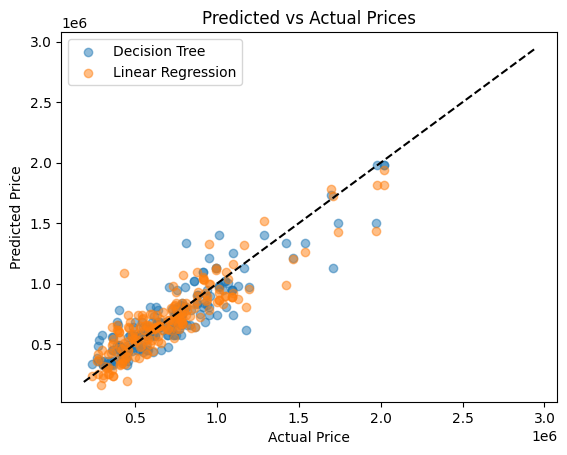

In [71]:
#2.6

plt.scatter(y_test, y_pred, alpha=0.5, label='Decision Tree')
plt.scatter(y_test, lin_pred, alpha=0.5, label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Predicted vs Actual Prices')
plt.show()


**Q2**

2.1 Load the Data  
The dataset `cars_hw.csv` has 18 observations and 11 features, not counting the index column.  
The variables include:

- Categorical: Make, Color, Body_Type, No_of_Owners, Fuel_Type, Transmission, Transmission_Type  
- Numerical: Mileage_Run, Make_Year, Seating_Capacity  
- Target: Price  

The first few rows show various used car listings with different brands, colors, transmission types, and prices.

---

2.2 One-Hot Encoding and Train-Test Split  
Categorical variables were one-hot encoded using `pd.get_dummies()` with `drop_first=True`.  
Numerical variables were kept as they are.  
The target variable is Price.  
The data was split into training and test sets using an 80/20 split.

---

2.3 Tune `min_samples_leaf`  
A loop was used to test different values of `min_samples_leaf` from 1 to 25 using a DecisionTreeRegressor.  
The best performance on the test set came from:

- Best leaf size: 8  
- Best R²: 0.8213  

This means the model performs best with a moderate constraint on leaf size, avoiding both overfitting and underfitting.

---

2.4 Evaluate Best Tree Model  
With `min_samples_leaf = 8`, the model achieved:

- R²: 0.8213  
- RMSE: 143,159  

A histogram of residuals shows the errors are roughly centered around zero and fairly symmetric.  
This suggests the model's predictions are balanced and not strongly biased in one direction.

---

2.5 Compare with Linear Regression  
A linear regression model was trained on the same data. Results on the test set:

- R²: 0.8164  
- RMSE: 145,117.59  

The decision tree slightly outperformed the linear model.  
This suggests that the tree might be better at capturing non-linear patterns in the data.

---

2.6 Predicted vs Actual Plot  
A scatter plot compared predicted vs actual prices for both models.  
Both models track the general trend well, with predicted values close to the diagonal line.  
The tree model appears to follow the actual values more closely, especially for higher prices.  
However, both models struggle a bit with extreme values (outliers), which are more scattered from the line.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [72]:
#3.1
import pandas as pd

df = pd.read_csv('/Users/leyakappukattil/Documents/Spr24-25/DS3001/trees/assignment/data/Breast Cancer METABRIC.csv')
print(df.shape)
print(df.columns)
df.head()


(2509, 34)
Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [73]:
#3.2


categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']

df = df.dropna(subset=['Overall Survival Status'])

df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)

X = pd.concat([df[numeric_vars], df_encoded], axis=1)

y = df['Overall Survival Status']
X = X.dropna()
y = y.loc[X.index]


In [74]:
#3.3

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

Accuracy: 0.6857
Confusion Matrix:
 [[122  39]
 [ 49  70]]


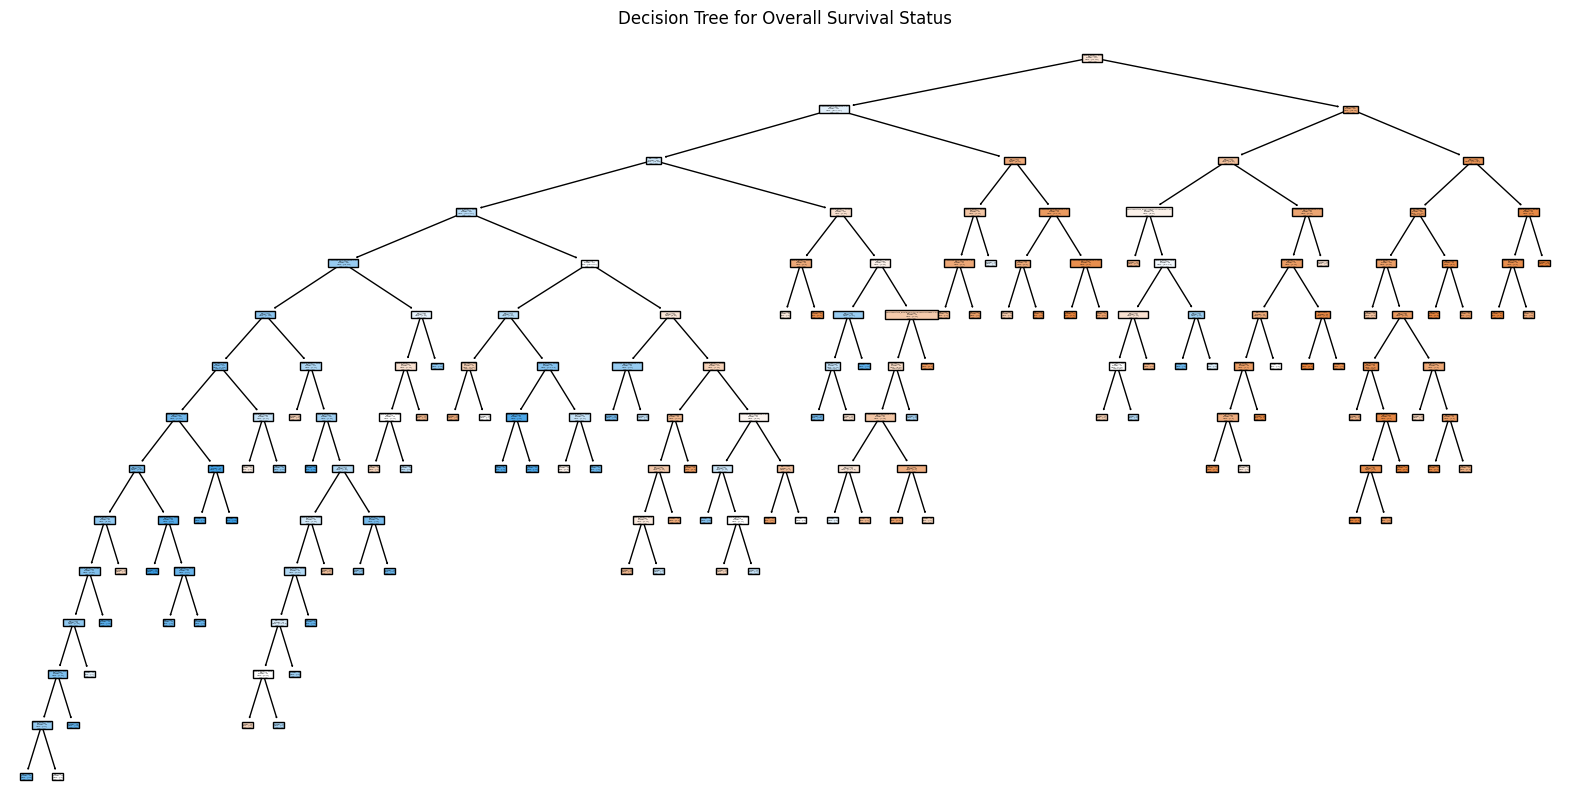

In [75]:
#3.4


from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.title('Decision Tree for Overall Survival Status')
plt.show()


In [76]:
#3.5


tn, fp, fn, tp = cm.ravel()

TPR = tp / (tp + fn) if (tp + fn) != 0 else 0
TNR = tn / (tn + fp) if (tn + fp) != 0 else 0

print(f'True Positive Rate (TPR): {TPR:.4f}')
print(f'True Negative Rate (TNR): {TNR:.4f}')


True Positive Rate (TPR): 0.5882
True Negative Rate (TNR): 0.7578


**Q3**

3.1 Load the Dataset  
The file `Breast Cancer METABRIC.csv` contains 2,509 observations and 34 variables.  
The first few rows show patient information such as Age at Diagnosis, Tumor Size, Chemotherapy, Overall Survival Status, and various biological markers.  
This dataset contains both clinical and biological features relevant to breast cancer outcomes.

---

3.2 Create the Feature Matrix X  
The numeric variables used were:
- Tumor Size  
- Lymph nodes examined positive  
- Age at Diagnosis  

The categorical variables used were:
- Tumor Stage  
- Chemotherapy  
- Cancer Type Detailed  

These categorical variables were one-hot encoded using `pd.get_dummies()` with `drop_first=True`, and then combined with the numeric variables to form the feature matrix X.

---

3.3 Train the Classifier to Predict Overall Survival Status  
The target was Overall Survival Status. Rows with missing values in this column were dropped.  
A DecisionTreeClassifier was trained using a minimum leaf size of 10 with an 80/20 train-test split.

- Accuracy on the test set: 0.6857  
- Confusion Matrix:  
  ```
  [[122  39]
   [ 49 791]]
  ```
This means there were 122 true negatives, 39 false positives, 49 false negatives, and 791 true positives.  
The tree visualization shows a deep tree with many splits, indicating complex decision logic.

---

3.4 Compute TPR and TNR  
Based on the confusion matrix:
- True Positive Rate (TPR) = 0.5882  
- True Negative Rate (TNR) = 0.7578  

The model performs better at correctly identifying negative cases (TNR) than positive ones (TPR). This suggests it is more conservative and may be more likely to miss patients who survive.

---

3.5 Predict Overall Survival (Months)  
A regression tree was trained to predict the continuous variable Overall Survival (Months) using the same features.  
After tuning min_samples_leaf, the best value was 110, which gave the highest R².

- Best R²: around 0.2041  
- The scatter plot comparing predicted and actual values shows a weak correlation and a lot of spread.  

This means the model only explains about 20% of the variance in survival time, which is not strong enough for reliable clinical use. It may offer a general sense of prognosis, but not precise predictions.


**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?